<a href="https://www.kaggle.com/code/hmahida/uncovering-antarctica-s-penguin-diversity-eda?scriptVersionId=118617967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### The Penguin dataset is an exploratory data analysis (EDA) of various penguin species found in Antarctica. The data includes information such as species, island, bill length, bill depth, flipper length, body mass, sex, and year of observation. 

#### This EDA aims to uncover insights and relationships within the data, such as identifying which species have the largest bill size or which island has the highest population of a specific penguin species. 

#### Additionally, it also helps to visualize the distribution of the different physical attributes of the penguins and check for any outliers. With this EDA, we can gain a better understanding of the penguin population in Antarctica and potentially aid in conservation efforts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins_df = pd.read_csv('/kaggle/input/palmer-archipelago-penguin-data/penguins_lter.csv')
penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


### Basic Insight from the Data

In [3]:
penguins_df.info(), penguins_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

(None,
 studyName                0
 Sample Number            0
 Species                  0
 Region                   0
 Island                   0
 Stage                    0
 Individual ID            0
 Clutch Completion        0
 Date Egg                 0
 Culmen Length (mm)       2
 Culmen Depth (mm)        2
 Flipper Length (mm)      2
 Body Mass (g)            2
 Sex                     10
 Delta 15 N (o/oo)       14
 Delta 13 C (o/oo)       13
 Comments               318
 dtype: int64)

### Data Cleansing

In [4]:
# Drop unnecessary columns
penguins_df.drop(columns=['Region', 'Stage', 'Individual ID', 'Comments'], inplace=True)

In [5]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    float64
 9   Body Mass (g)        342 non-null    float64
 10  Sex                  334 non-null    object 
 11  Delta 15 N (o/oo)    330 non-null    float64
 12  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 35.1+ KB


## Data Wrangling


### Dealing with missing values

In [6]:
penguins_df.isnull().sum()/penguins_df.notnull().sum()
penguins_df.drop(penguins_df[penguins_df.Sex == '.'].index, inplace=True)

In [7]:
# Omit the rows with empty cells in 'Culmen Length' column
penguins_df.dropna(subset=['Culmen Length (mm)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)' ], inplace=True)

### Changing the datatype

In [8]:
# Change 'Date Egg' datatype from string to datetime
penguins_df['Date Egg'] = pd.to_datetime(penguins_df['Date Egg'])

In [9]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            324 non-null    object        
 1   Sample Number        324 non-null    int64         
 2   Species              324 non-null    object        
 3   Island               324 non-null    object        
 4   Clutch Completion    324 non-null    object        
 5   Date Egg             324 non-null    datetime64[ns]
 6   Culmen Length (mm)   324 non-null    float64       
 7   Culmen Depth (mm)    324 non-null    float64       
 8   Flipper Length (mm)  324 non-null    float64       
 9   Body Mass (g)        324 non-null    float64       
 10  Sex                  324 non-null    object        
 11  Delta 15 N (o/oo)    324 non-null    float64       
 12  Delta 13 C (o/oo)    324 non-null    float64       
dtypes: datetime64[ns](1), float64(6), i

## Univariate Analysis

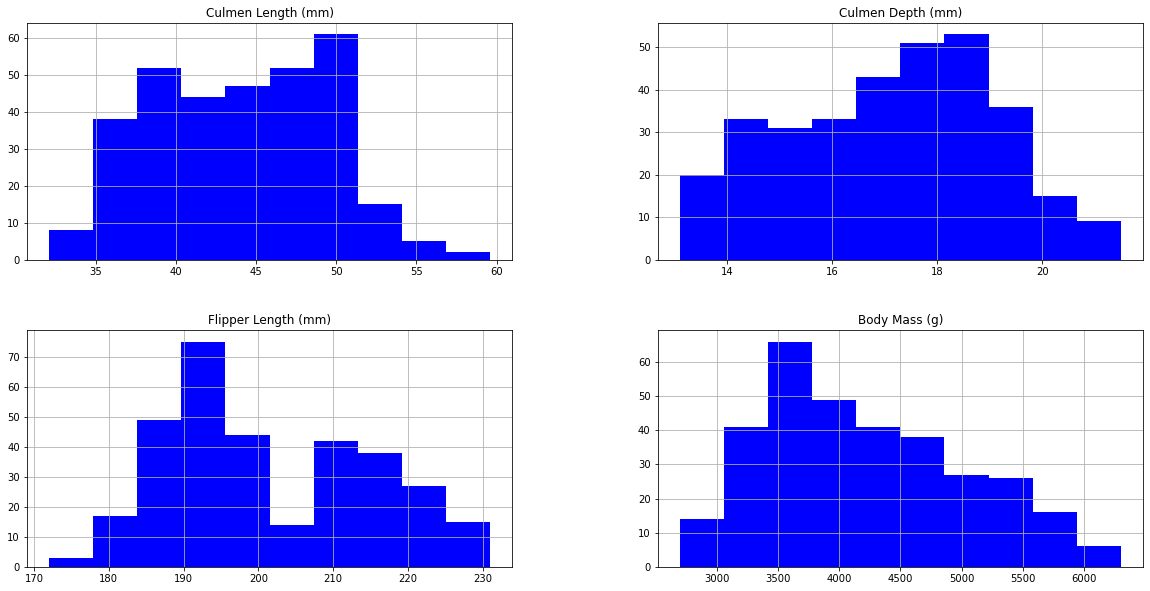

In [10]:
penguins_df[['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)', 'Body Mass (g)']].hist(figsize=(20,10),bins=10,color='Blue') 
plt.show()

### From the histograms above we find the following information.
- Culmen Length in most penguins is in the range from 35 to 53 mm.
- Culmen depth in most penguins is in the range from 14 to 20 mm.
- Flipper depth in most penguins is in the range from 185 to 225 mm.
- Body Mass in most penguins is in the range from 3250 to 5750 g.

## Multivariate Analysis

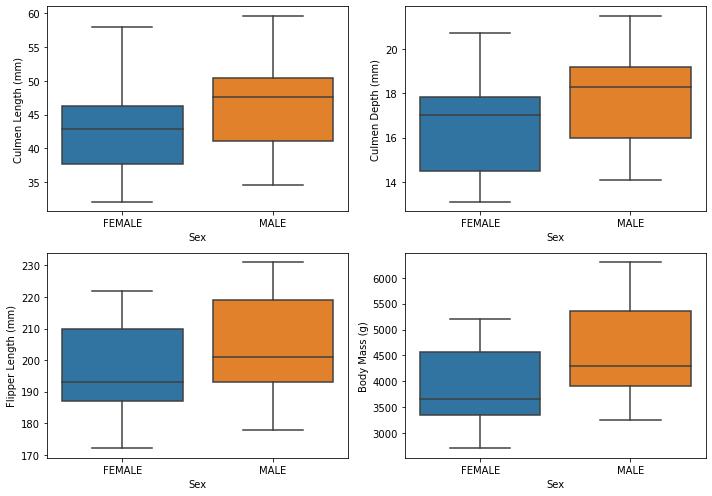

In [11]:
fig, axes = plt.subplots(2,2, figsize=(10, 7))
# boxplot to show relationship between 'Sex' and 'Culmen Length'
sns.boxplot(data=penguins_df, x='Sex', y='Culmen Length (mm)', ax=axes[0,0])
# boxplot to show relationship between 'Sex' and 'price'
sns.boxplot(data=penguins_df, x='Sex', y='Culmen Depth (mm)', ax=axes[0,1])
# boxplot to show relationship between 'Sex' and 'Culmen Depth'
sns.boxplot(data=penguins_df, x='Sex', y='Flipper Length (mm)', ax=axes[1,0])
# boxplot to show relationship between 'Sex' and 'Body Mass'
sns.boxplot(data=penguins_df, x='Sex', y='Body Mass (g)', ax=axes[1,1])
plt.tight_layout()

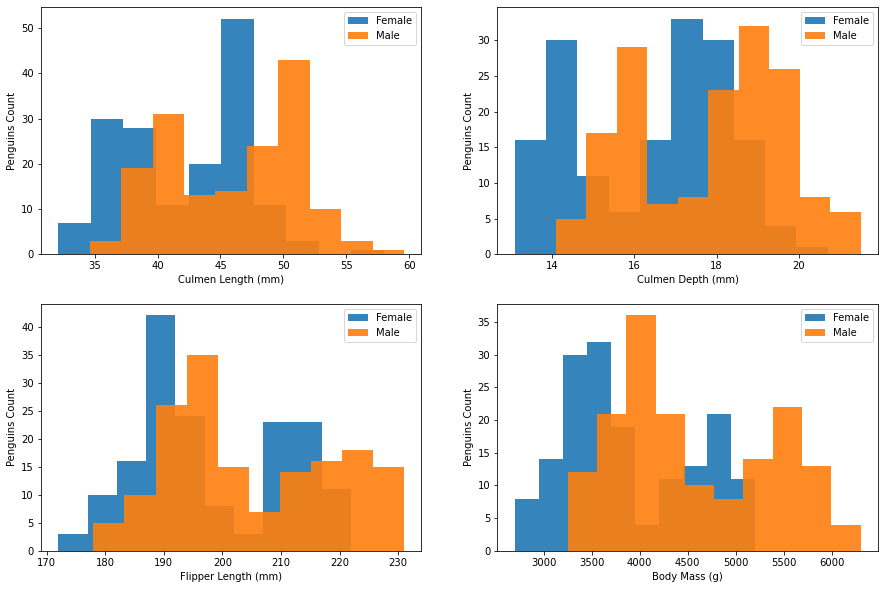

In [12]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

gender = penguins_df.groupby(by='Sex', axis=0)
female = gender.get_group('FEMALE')
male = gender.get_group('MALE')

aa = female['Culmen Length (mm)'].hist(ax=axes[0,0], alpha=0.9, bins=10)
male['Culmen Length (mm)'].hist(ax=axes[0,0], alpha=0.9, bins=10)
aa.grid(False)
aa.set_xlabel('Culmen Length (mm)')
aa.set_ylabel('Penguins Count')
aa.legend(['Female','Male'])

ab = female['Culmen Depth (mm)'].hist(ax=axes[0,1], alpha=0.9, bins=10)
male['Culmen Depth (mm)'].hist(ax=axes[0,1], alpha=0.9, bins=10)
ab.grid(False)
ab.set_xlabel('Culmen Depth (mm)')
ab.set_ylabel('Penguins Count')
ab.legend(['Female','Male'])

ac = female['Flipper Length (mm)'].hist(ax=axes[1,0], alpha=0.9, bins=10)
male['Flipper Length (mm)'].hist(ax=axes[1,0], alpha=0.9, bins=10)
ac.grid(False)
ac.set_xlabel('Flipper Length (mm)')
ac.set_ylabel('Penguins Count')
ac.legend(['Female','Male'])

ad = female['Body Mass (g)'].hist(ax=axes[1,1], alpha=0.9, bins=10)
male['Body Mass (g)'].hist(ax=axes[1,1], alpha=0.9, bins=10)
ad.grid(False)
ad.set_xlabel('Body Mass (g)')
ad.set_ylabel('Penguins Count')
ad.legend(['Female','Male'])

In [13]:
species = penguins_df.groupby(by=['Species', 'Island']).count().iloc[:,0:1]
species.rename(columns={'studyName':'Number of Penguins'}, inplace=True)
species

Number of Penguins
Species                                   Island                       
Adelie Penguin (Pygoscelis adeliae)       Biscoe                     44
                                          Dream                      52
                                          Torgersen                  43
Chinstrap penguin (Pygoscelis antarctica) Dream                      67
Gentoo penguin (Pygoscelis papua)         Biscoe                    118

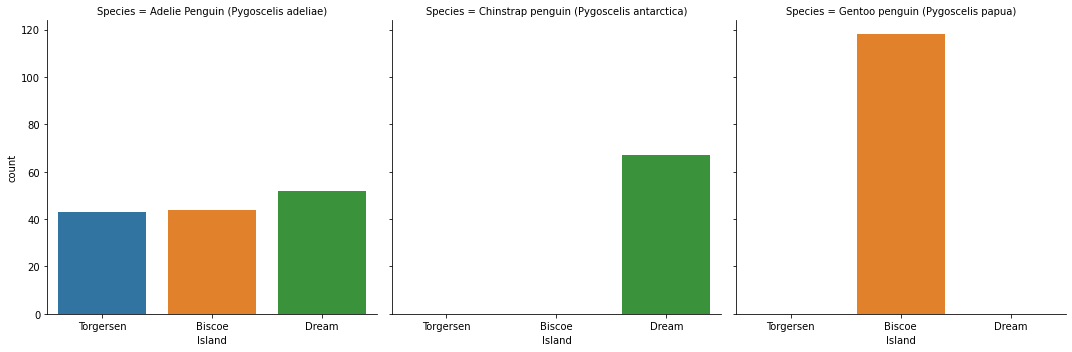

In [14]:
sns.catplot(data=penguins_df, x='Island', col='Species', kind='count')

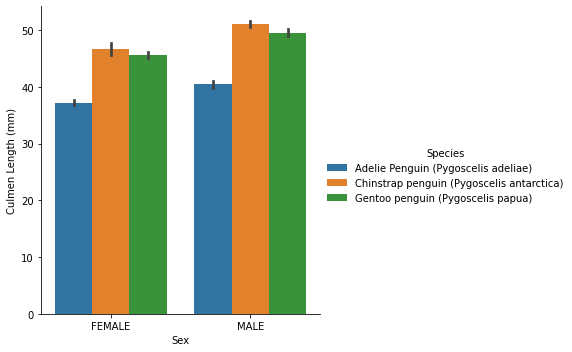

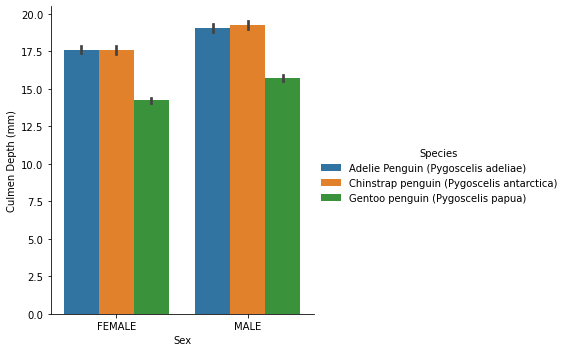

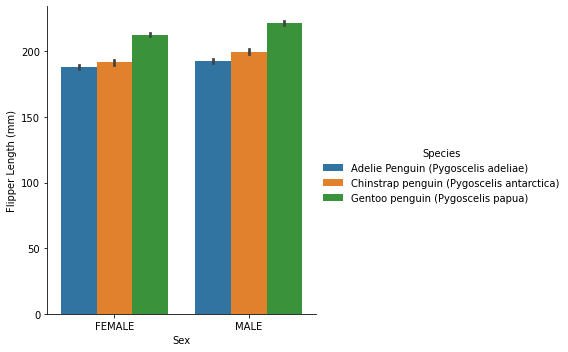

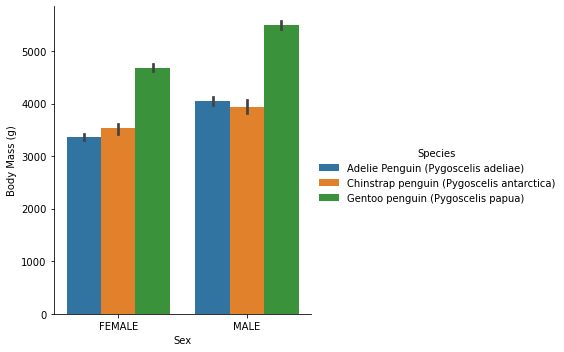

In [15]:
#catplot to show relationship between 'Sex' and 'Culmen Length' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Culmen Length (mm)', hue='Species', kind='bar')
#catplot to show relationship between 'Sex' and 'Culmen Depth' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Culmen Depth (mm)', hue='Species', kind='bar')
#catplot to show relationship between 'Sex' and 'Flipper Length' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Flipper Length (mm)', hue='Species', kind='bar')
#catplot to show relationship between 'Sex' and 'Body Mass' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Body Mass (g)', hue='Species', kind='bar')

### From the bar charts above we find the following information.
- Culmen length and depth, flipper length and body masses are generally greater in male penguins compared to female penguins.
- In Adeline, Chinstrap and Gentoo penguin species, generally Chinstrap penguins have longest culmen length and Adelie penguins have shortest culmen length.
- Generally, Gentoo penguins have longer flipper compared to Adeline and Chinstrap penguins which have almost similar flipper lengths.
- Generally, Gentoo penguins have higher body mass compared to Adeline and Chinstrap penguins which have almost similar body mass.


<AxesSubplot:>

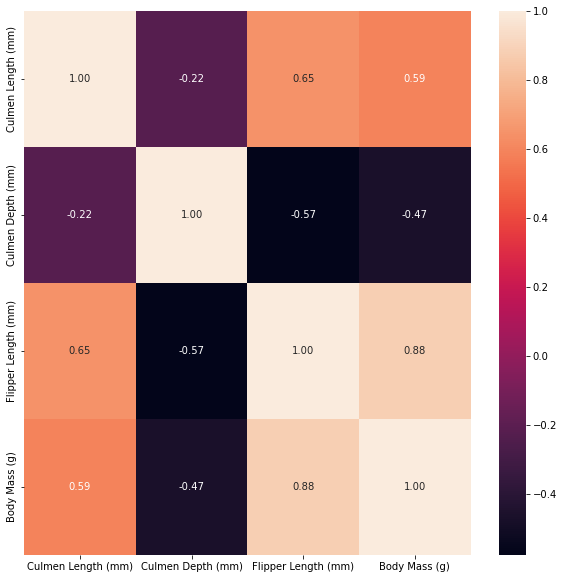

In [16]:
heatmap_df = penguins_df.drop(columns=['Sample Number','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])
corr = heatmap_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')

### From the heatmap above we find the following information.
- There is a negative corelation between penguin Body Mass and Culmen depth.
- There is a strong positive corelation between penguin Body Mass and Flipper length.
- There is a moderate positive corelation between penguin Body Mass and Culmen length.
- There is a moderate positive corelation between Flipper length and Culmen length.
- There is a moderate negative corelation between Flipper length and Culmen depth.
- There is a weak negative corelation between Culmen length and Culmen depth.
